In [1]:
import pandas
import os
from scripts.statement import Summary
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
pandas.set_option('display.max_colwidth', None)
pandas.options.display.float_format = "{:,.1f}".format
if not os.path.exists('data'):
    os.makedirs('data')
if not os.path.exists('img'):
    os.makedirs('img')

In [2]:
S = Summary(years=["2025"])

In [3]:
S.update()

In [4]:
df = S.projected.copy()
df.to_csv("data/{}/summary.csv".format(S.folders[-1]))
df

,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07,account,account,account,...,account,account,account,account,account,account,account,account,account,account
type,,,,,,,,,,,,,,,,,,,,,
Payroll (UCSD),"7,938.3","4,457.0",0.0,"4,457.0","8,913.9",0.0,"4,457.0",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Payroll (SDSU),"5,717.3",0.0,"3,088.9","3,088.9","3,088.9","3,088.9","6,177.7",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH_CREDIT,0.0,"5,031.0",0.0,"2,013.6","6,271.9",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fees & adjustments,0.0,-128.0,"-1,047.9",-31.2,0.0,"9,046.1",-72.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax Return,0.0,627.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zelle,0.0,40.4,50.0,14.0,28.6,88.5,40.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MISC_CREDIT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Payment to card,0.0,246.5,-246.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACCT_XFER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
for y in S.years:
    print(f"Year: {y}")
    tmp = df[[i for i in df.columns if y in i]]
    total_income = tmp[tmp.index.str.contains("Payroll|BBVA")].sum().sum()
    print(f"   Total income: ${total_income:,.1f}")
    total_savings = tmp.sum().sum()
    print(f"   Total savings: ${total_savings:,.1f}")
    print(f"   Average monthly income: ${total_income/12:,.1f}")
    print(f"   Average monthly savings: ${total_savings/12:,.1f}")
    print(f"   Average savings rate: {total_savings/total_income*100:,.1f}%")
    final = S.projected_balance[f"{y}-12"]
    print(f"   Final balance: ${final:,.1f}")


Year: 2025
   Total income: $74,473.7
   Total savings: $1,763.5
   Average monthly income: $6,206.1
   Average monthly savings: $147.0
   Average savings rate: 2.4%
   Final balance: $8,281.5


#### Subscriptions

In [6]:
subscriptions = S.get_subscriptions()
subscriptions

,date,description,type,amount,account,balance
60,2025-07-01,UCSD PARKING MOBILE EBIZ,Travel,-3.7,NaN,NaN
0,2025-07-02,MTS- PRONTO,Travel,-5.0,NaN,NaN
54,2025-07-03,MTS- PRONTO,Travel,-10.0,NaN,NaN
49,2025-07-06,GOOGLE *Google One,Shopping,-3.0,NaN,NaN
48,2025-07-06,MTS- PRONTO,Travel,-5.0,NaN,NaN
47,2025-07-06,GOOGLE *YouTubePremium,Bills & Utilities,-14.0,NaN,NaN
20,2025-07-07,UBER *TRIP,Travel,-30.9,NaN,NaN
19,2025-07-07,MINT MOBILE,Mint,-21.0,NaN,NaN
17,2025-07-08,UBER *TRIP,Travel,-17.9,NaN,NaN
18,2025-07-08,UBER *TRIP,Travel,-18.9,NaN,NaN


## Report

Final balance: $8,281.45


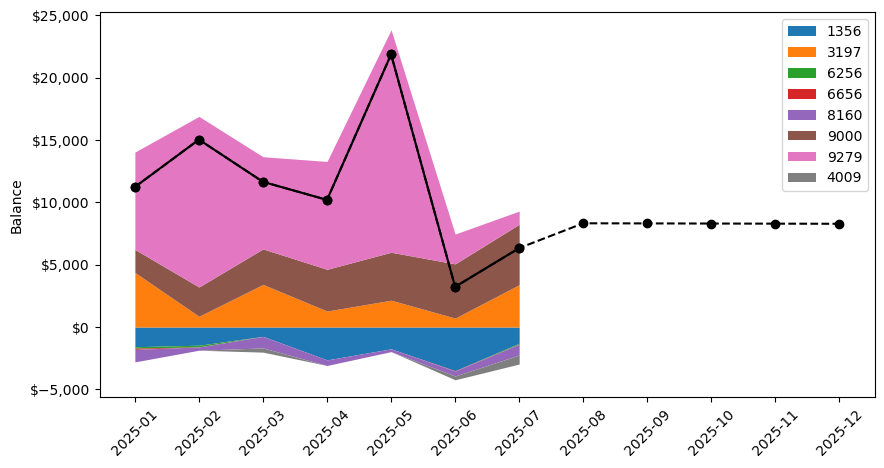

In [7]:
S.update()
fig,ax = plt.subplots(1,1,figsize=(10,5))
# Plot projected balance
S.projected_balance.plot(marker="o",color="black",linestyle="--",ax=ax)
print(f"Final balance: ${S.projected_balance.iloc[-1]:,.2f}")

# Plot actual balance
S.balance.plot(marker="o",color="black",ax=ax)
# Plot area plot with no lines
S.balances.T.plot.area(ax=ax,linewidth=0)

# Set the title and labels
_=ax.set_xticks(ticks=range(len(S.projected_balance)), labels=S.projected_balance.index, rotation=45)
# Plot with Y-axis formatted as currency
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.ylabel("Balance")
plt.savefig("img/{}-projected.png".format(S.folders[-1]),format="PNG")

In [23]:
tmp = S.data[-1].statement
tmp[tmp["type"]=="Travel"]

,date,description,type,amount,account,balance
60,2025-07-01,UCSD PARKING MOBILE EBIZ,Travel,-3.7,NaN,NaN
56,2025-07-01,SOUTHWES 5262360892966,Travel,-173.0,NaN,NaN
59,2025-07-01,UNITED 0162499833289,Travel,-125.6,NaN,NaN
58,2025-07-01,SOUTHWES 5262360885264,Travel,-28.3,NaN,NaN
57,2025-07-01,SPIRIT AIRL 4870438729682,Travel,-109.0,NaN,NaN
54,2025-07-03,MTS- PRONTO,Travel,-10.0,NaN,NaN
48,2025-07-06,MTS- PRONTO,Travel,-5.0,NaN,NaN
45,2025-07-08,UCSD PARKING MOBILE EBIZ,Travel,-3.7,NaN,NaN
42,2025-07-10,LAZ PARKING M14580,Travel,-3.0,NaN,NaN
36,2025-07-13,UCSD PARKING MOBILE EBIZ,Travel,-3.7,NaN,NaN


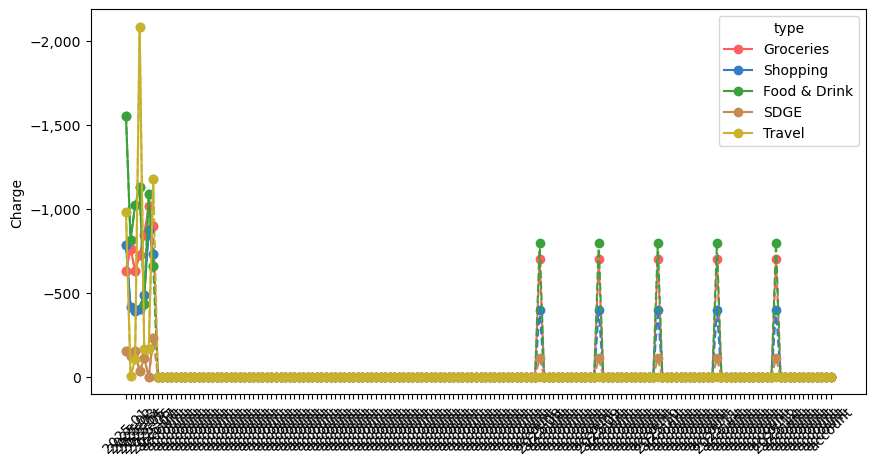

In [8]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
categories = ["Groceries","Shopping","Food & Drink","SDGE","Travel"]
colors = ["#FD5F5F","#337CC6","#3BA13B","#C68B51","#C8B12D"]
S.projected.loc[categories].T.plot(marker="o",linestyle="--",ax=ax,color=colors,legend=False)
S.summary.loc[categories].T.plot(marker="o",ax=ax,color=colors)
_=ax.set_xticks(ticks=range(len(S.projected.columns)), labels=S.projected.columns, rotation=45)
ax.invert_yaxis()
ax.yaxis.set_major_formatter('{x:,.0f}')
plt.ylabel("Charge")
plt.savefig("./img/{}_individual.png".format(S.id),format="PNG")

## Changes

In [9]:
df.sum()

2025-01    4,669.4
2025-02    4,322.7
2025-03   -5,224.1
2025-04      644.6
2025-05   11,561.4
            ...   
account        0.0
account        0.0
account        0.0
account        0.0
account        0.0
Length: 156, dtype: float64

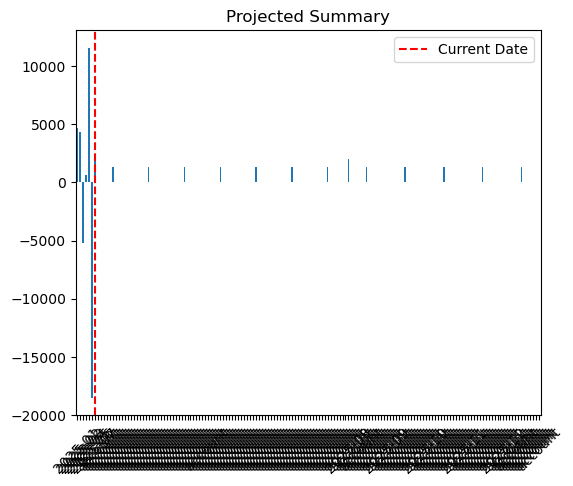

In [10]:
df.sum().plot(kind='bar', figsize=(6,5), title="Changes")
# Draw a line at current date
current_date = df.columns.to_list().index(S.folders[-1])
plt.axvline(x=current_date, color='r', linestyle='--', label='Current Date')
plt.legend()
plt.title("Projected Summary")
_=plt.xticks(rotation=45)

In [11]:
S.update()
df = S.projected.copy()

<Axes: title={'center': 'Changes'}>

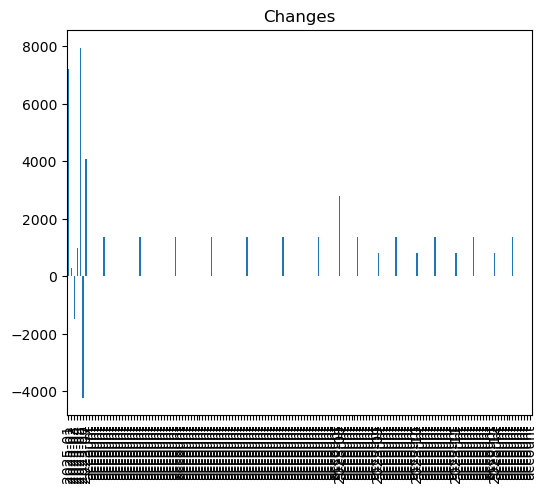

In [12]:
categories = "Payroll|Bills|Rent|Travel|Diezmo|Mama|Marky|Shopping|Food|Car|Internet"
df.loc[df.index.str.contains(categories)]
df.loc[df.index.str.contains(categories)].sum().plot(kind='bar', figsize=(6,5), title="Changes")

### Deltas

In [13]:
S.deltas

,2025-01,2025-02,2025-03,2025-04,2025-05,2025-06,2025-07
type,,,,,,,
Debt,-465.9,-465.9,-465.9,-465.9,-465.9,"-21,409.7",0.0
Rent,"-2,833.2","-2,839.0","-2,837.6","-2,822.0","-2,833.5","-4,839.9","-3,837.3"
Travel,-979.3,-3.0,-103.3,"-2,086.4",-166.6,-166.3,"-1,176.5"
Shopping,-385.8,-14.5,6.1,-3.2,-86.5,-474.5,-330.6
Personal,-592.7,0.0,0.0,0.0,-99.9,-39.0,-400.0
Food & Drink,-753.2,-14.5,-221.9,-329.8,366.0,-287.2,138.2
GEICO,0.0,0.0,"-1,028.8",0.0,0.0,0.0,0.0
Education,-180.0,-312.2,-27.4,-2.7,-366.0,-83.7,-52.4
Remitly,0.0,0.0,0.0,-246.4,-521.3,-84.0,0.0


In [14]:
S.deltas.sum()

2025-01     6,679.4
2025-02     6,332.8
2025-03    -3,214.1
2025-04     2,654.6
2025-05    13,571.4
2025-06   -16,349.5
2025-07     4,352.9
dtype: float64

### Check a month

In [15]:
s = S.get("2025-03")

In [16]:
s.comparison.sort_values("delta")

,expected,account,amount,delta
type,,,,
Rent,0.0,0.0,"-2,837.6","-2,837.6"
Fees & adjustments,0.0,0.0,"-1,047.9","-1,047.9"
GEICO,0.0,0.0,"-1,028.8","-1,028.8"
Debt,0.0,0.0,-465.9,-465.9
Payment to card,0.0,0.0,-246.5,-246.5
Food & Drink,-800.0,0.0,"-1,021.9",-221.9
Gas,0.0,0.0,-123.0,-123.0
Marky,0.0,0.0,-109.2,-109.2
Travel,0.0,0.0,-103.3,-103.3


In [17]:
df = s.statement
df[df["type"].str.contains("Marky")]

,date,description,type,amount,account,balance
49,2025-03-02,PETCO VITAL CARE 4200,Marky,-26.9,NaN,NaN
23,2025-03-16,PETCO 0559,Marky,-3.2,NaN,NaN
22,2025-03-16,PETCO 0559,Marky,-52.1,NaN,NaN
5,2025-03-30,PETCO VITAL CARE 4200,Marky,-26.9,NaN,NaN


### Average values all time

In [18]:
S.summary.mean(axis=1)

type
Payroll (UCSD)           4,317.6
Payroll (SDSU)           3,464.4
ACH_CREDIT               1,902.4
Fees & adjustments       1,109.5
Tax Return                  89.6
Zelle                       37.5
MISC_CREDIT                  0.0
Payment to card              0.0
ACCT_XFER                    0.0
FEE_TRANSACTION             -0.4
Gifts & Donations           -2.2
Automotive                  -7.1
Professional Services      -12.6
Entertainment              -41.8
Marky                      -43.4
Bills & Utilities          -66.3
Mint                       -74.8
Health & Wellness          -75.1
Internet                   -75.8
ACH_DEBIT                  -94.6
Gas                       -109.7
SDGE                      -115.0
Remitly                   -121.7
Education                 -146.3
GEICO                     -147.0
Personal                  -161.7
Shopping                  -584.1
Travel                    -668.8
Groceries                 -787.0
Food & Drink              -957.5
Rent 